In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv("./NFLX.csv")

In [19]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [20]:
viz = df.copy()

In [21]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [22]:
df.shape

(1009, 7)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


In [25]:
train, test = train_test_split(df, test_size = 0.2)

In [26]:
test_pred = test.copy()

In [27]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
905,2021-09-09,606.469971,609.440002,596.549988,597.539978,597.539978,2954200
460,2019-12-03,302.220001,307.359985,301.880005,306.160004,306.160004,4992800
426,2019-10-15,283.820007,285.869995,279.399994,284.250000,284.250000,7685600
948,2021-11-09,653.700012,660.500000,650.520020,655.989990,655.989990,2415600
533,2020-03-19,324.329987,348.510010,316.820007,332.029999,332.029999,10616000
609,2020-07-08,498.579987,505.100006,493.809998,502.779999,502.779999,5691700
884,2021-08-10,520.000000,520.789978,512.969971,515.840027,515.840027,1960500
454,2019-11-22,309.100006,311.399994,304.410004,310.480011,310.480011,5970100
836,2021-06-02,499.820007,503.220001,495.820007,499.239990,499.239990,2269000
479,2019-12-31,322.000000,324.920013,321.089996,323.570007,323.570007,3713300


In [28]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
683,2020-10-21,501.029999,506.850006,488.250000,489.049988,489.049988,17405700
195,2018-11-12,300.000000,302.489990,290.630005,294.070007,294.070007,10924800
501,2020-02-03,347.239990,359.630005,346.279999,358.000000,358.000000,6670600
734,2021-01-05,521.549988,526.780029,515.890015,520.799988,520.799988,3133900
86,2018-06-08,358.059998,362.390015,356.250000,360.570007,360.570007,5225700
336,2019-06-07,357.390015,365.149994,355.690002,360.869995,360.869995,4777300
443,2019-11-07,290.700012,298.190002,288.269989,289.570007,289.570007,5928500
572,2020-05-14,444.899994,452.380005,432.820007,441.950012,441.950012,9007500
246,2019-01-29,335.869995,338.220001,328.149994,328.899994,328.899994,7655200
632,2020-08-10,493.350006,497.459991,478.630005,483.380005,483.380005,4691200


In [29]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [30]:
y_train = train['Close'].values
y_test = test['Close'].values

LINEAR REGRESSION

In [31]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [32]:
y_pred = model_lnr.predict(x_test)

In [33]:
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[257.52573733]


EVALUATION OF MODEL

In [34]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))



MSE 12.586
RMSE 3.548
MAE 2.814
MAPE 0.007
R2 Score :  0.999


Visualisation Of Model

In [36]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

In [37]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [38]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data


,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


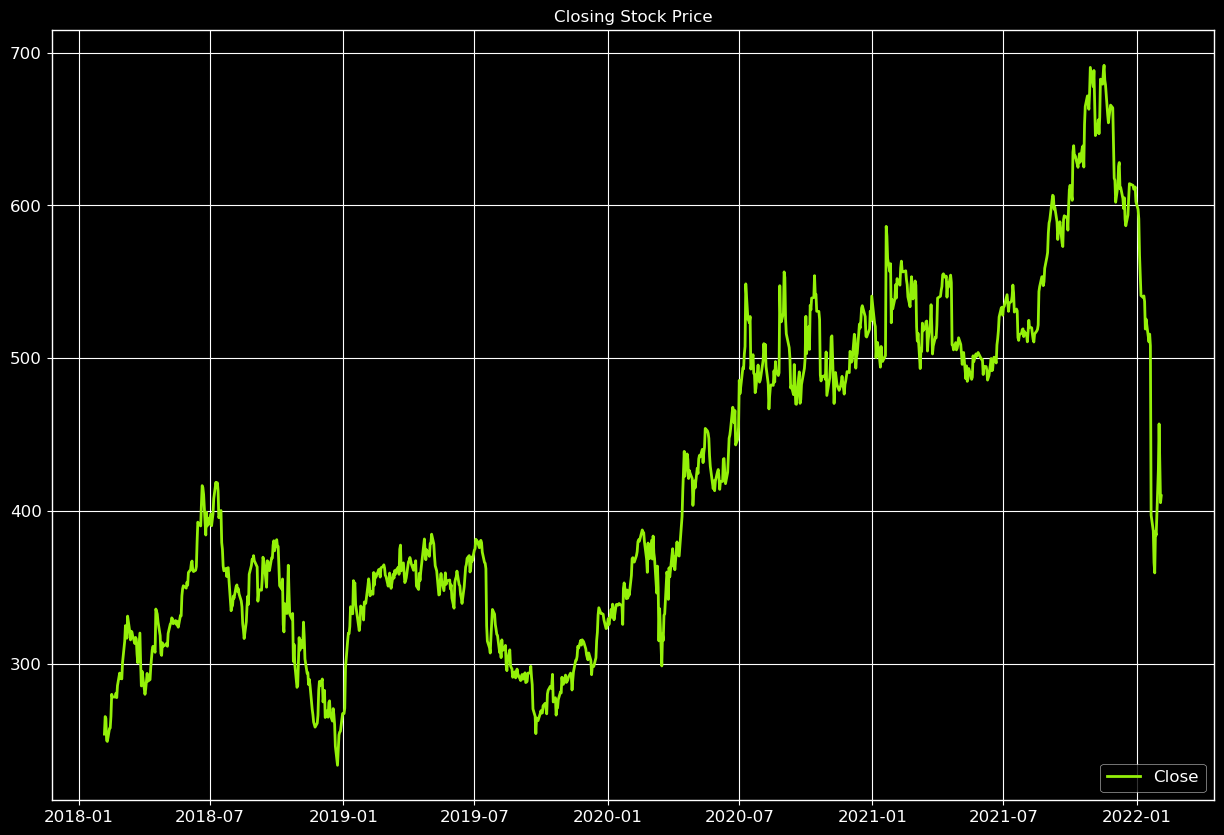

In [40]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

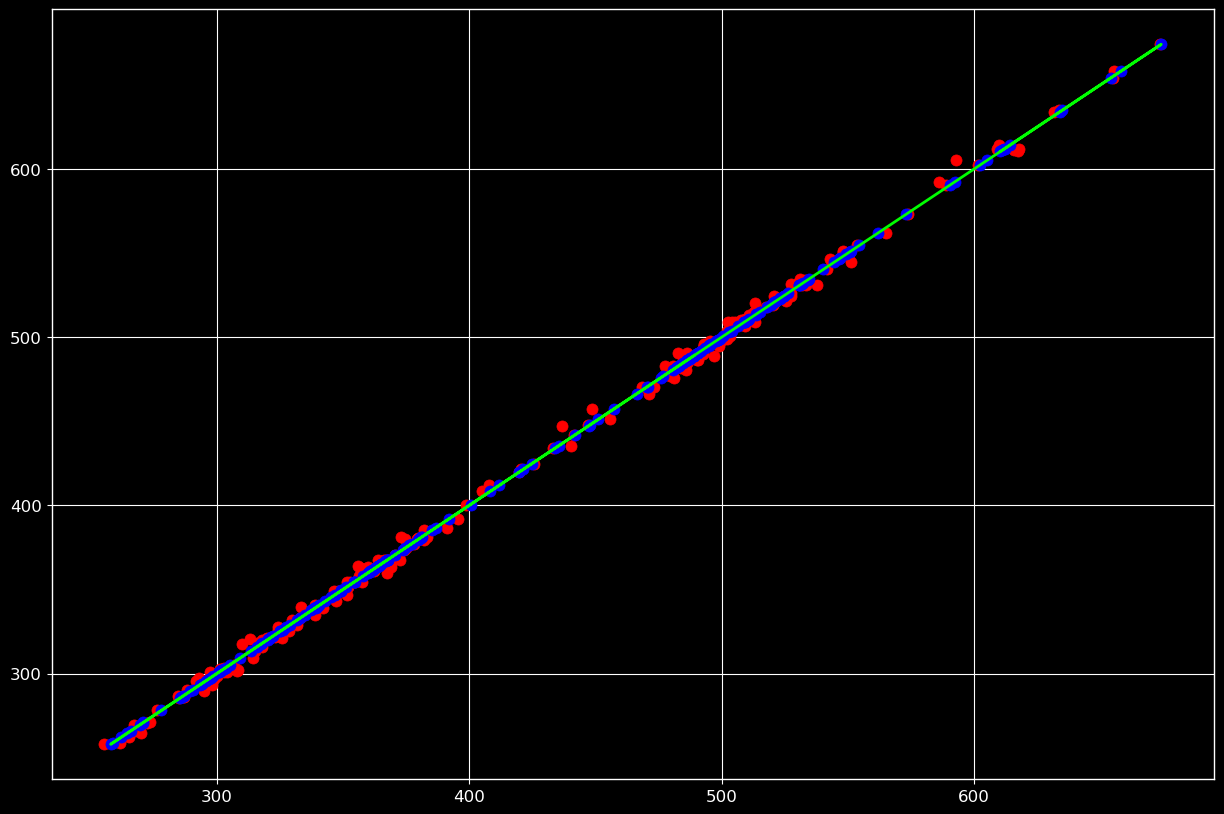

In [41]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [42]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
683,2020-10-21,501.029999,506.850006,488.250000,489.049988,489.049988,17405700,496.729375
195,2018-11-12,300.000000,302.489990,290.630005,294.070007,294.070007,10924800,295.067344
501,2020-02-03,347.239990,359.630005,346.279999,358.000000,358.000000,6670600,356.383813
734,2021-01-05,521.549988,526.780029,515.890015,520.799988,520.799988,3133900,521.187010
86,2018-06-08,358.059998,362.390015,356.250000,360.570007,360.570007,5225700,360.269380
...,...,...,...,...,...,...,...,...
230,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,293.029616
930,2021-10-14,632.229980,636.880005,626.789978,633.799988,633.799988,2671700,631.698671
845,2021-06-15,501.230011,501.230011,490.399994,491.899994,491.899994,3104100,492.573804
640,2020-08-20,484.690002,498.940002,483.890015,497.899994,497.899994,5132500,495.367383


In [43]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,423.600990,102.591375,257.950012,338.810005,396.230011,508.810005,674.049988
Close_Prediction,202.0,423.526749,102.253033,255.496805,338.483334,397.170510,504.814949,673.498879
